In [64]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [65]:
model = BabyMAKROModelClass(name='ExtendedG')

In [66]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state and Jacobian


In [67]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 7.44,  ss.L = 56.28,  ss.delta_L = 0.07,  ss.v = 16.52,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 55.87,  ss.W = 2.68
Government:
ss.B_G = 150.00,  ss.G = 50.00,  ss.tau = 0.37
Households:
solving for household behavior: result.converged = True
ss.C = 91.23,  ss.B = 249.03
Production firm FOCs:
ss.K = 557.43
Capital accumulation equation:
ss.I = 55.74
Output in production firm:
ss.Y = 229.56
Market clearing:
ss.C_Y = 63.86,  ss.G_Y = 35.00,  ss.I_Y = 36.23,  ss.X_Y = 94.47
[ ss.C_M = 27.37,  ss.G_M = 15.00,  ss.I_M = 19.51,  ss.X_M = 62.98 ] = ss.M = 124.86
ss.X = 157.45
Bargaining:
par.phi = 0.984


In [68]:
model.calc_jac(do_print=True)

Jacobian calculated in 35.5 secs secs


# Find IRF

In [69]:
model.set_exo_ss()

In [70]:
Tshock = 50
shock = 0.01*model.ss.G
persistence = 0.80**np.arange(Tshock)
model.sol.G[:Tshock] = model.ss.G + shock*persistence
model.find_IRF()

initial:
   max. abs. error = 4.33e+01
    0.00e+00 in bargaining_cond
    4.33e+01 in Bq_match
    0.00e+00 in FOC_capital_agency
    8.88e-15 in FOC_K_ell
    5.05e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.2 secs
   max. abs. error = 4.33e+01
    4.88e-03 in bargaining_cond
    1.55e+00 in Bq_match
    2.02e-03 in FOC_capital_agency
    7.72e-02 in FOC_K_ell
    9.75e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.55e+00
    1.81e-03 in bargaining_cond
    3.86e-01 in Bq_match
    6.27e-04 in FOC_capital_agency
    2.40e-02 in FOC_K_ell
    3.80e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 3.86e-01
    2.18e-04 in bargaining_cond
    3.70e-02 in Bq_match
    1.17e-04 in FOC_capital_agency
    3.34e-03 in FOC_K_ell
    5.06e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Figures

## National accouting - quantities

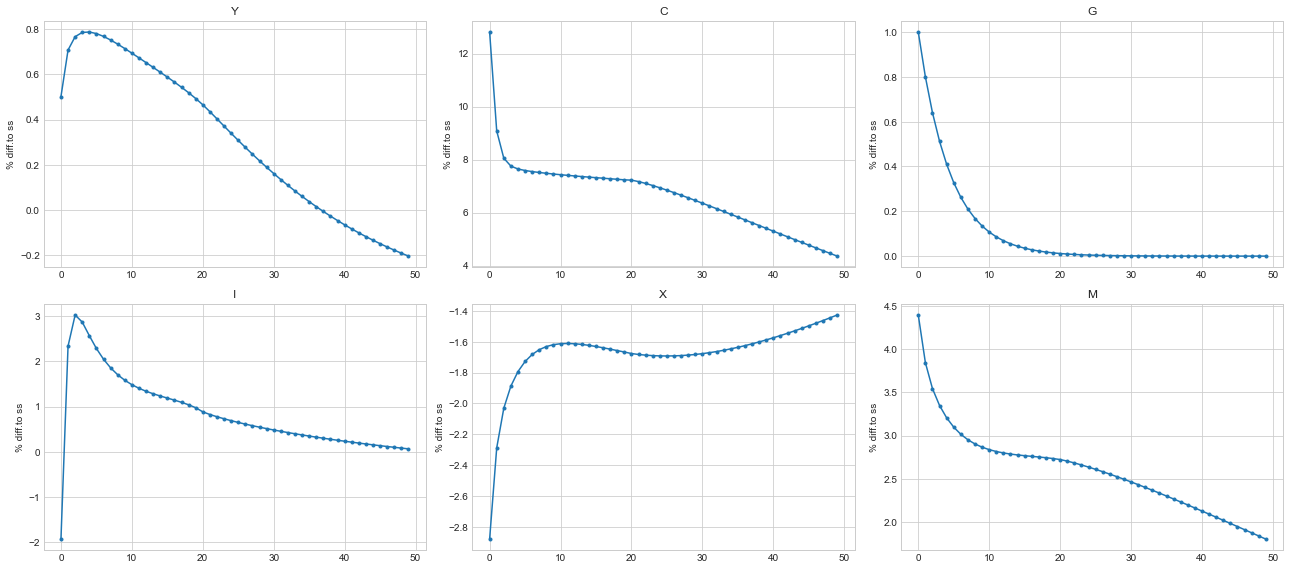

In [71]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

## National Accouting - Prices

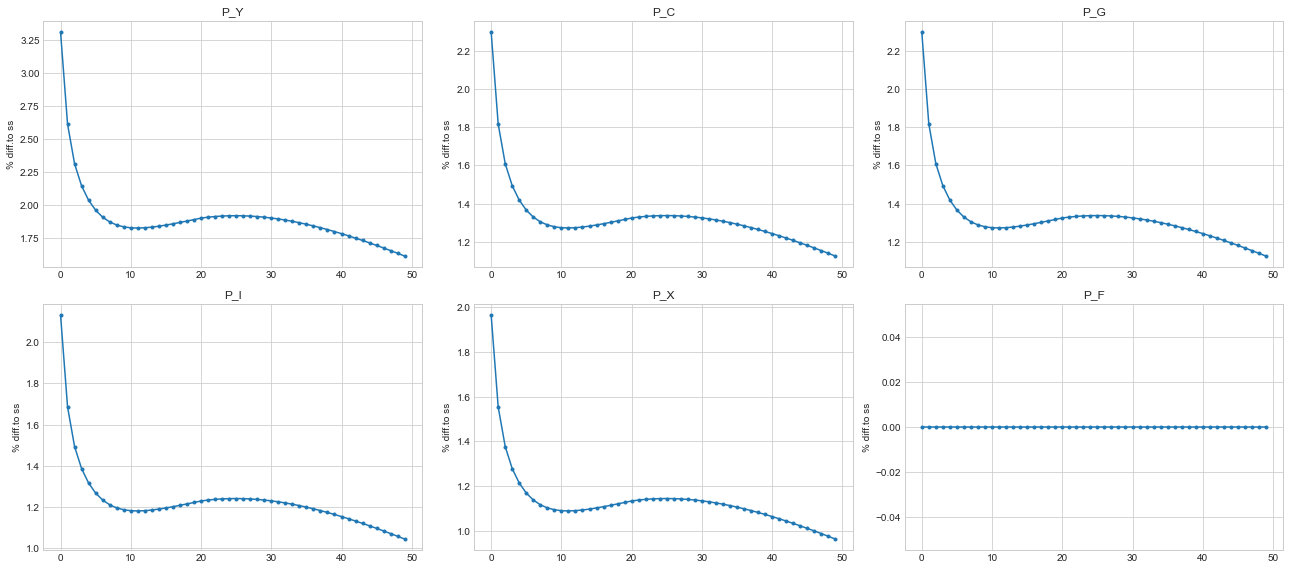

In [58]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F'])

## Labor market

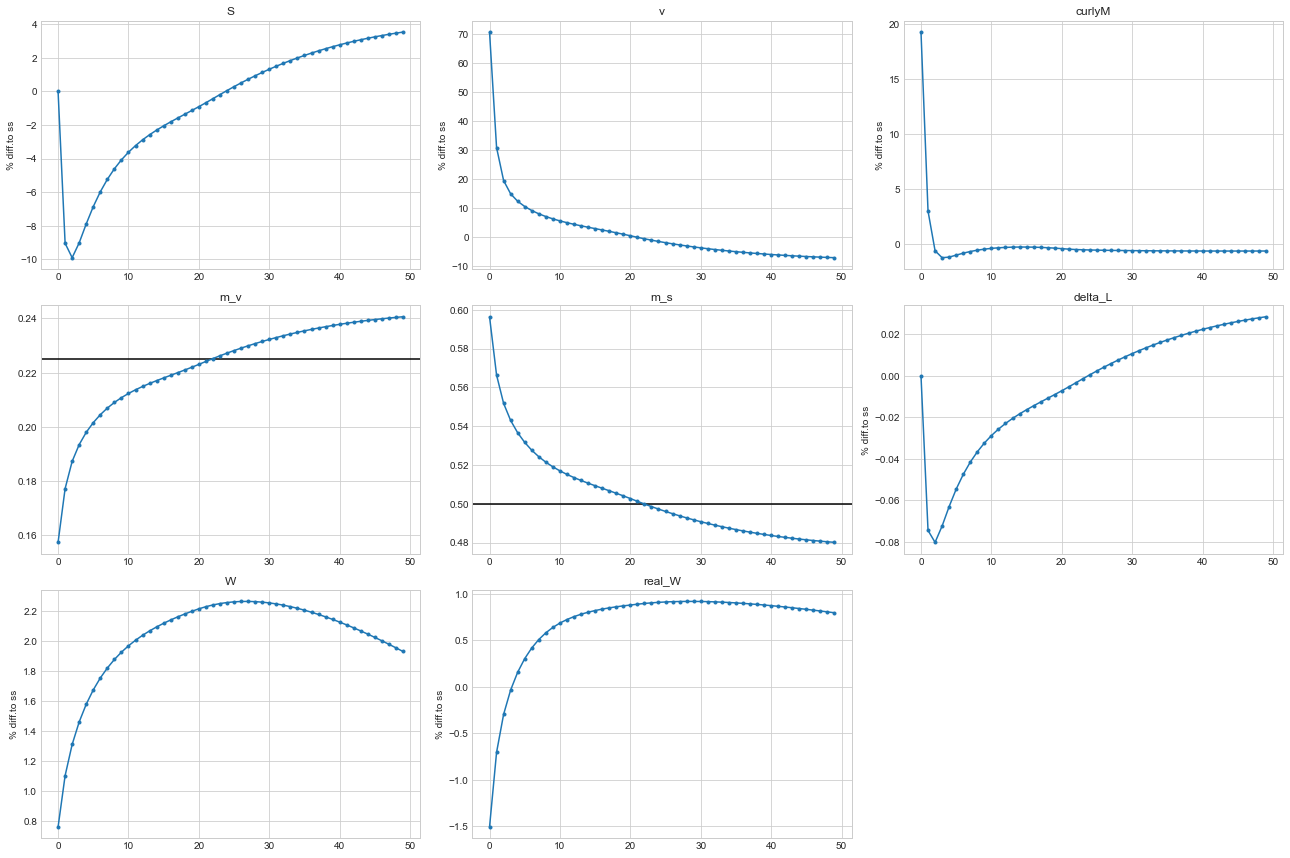

In [59]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

## Capital accumulation

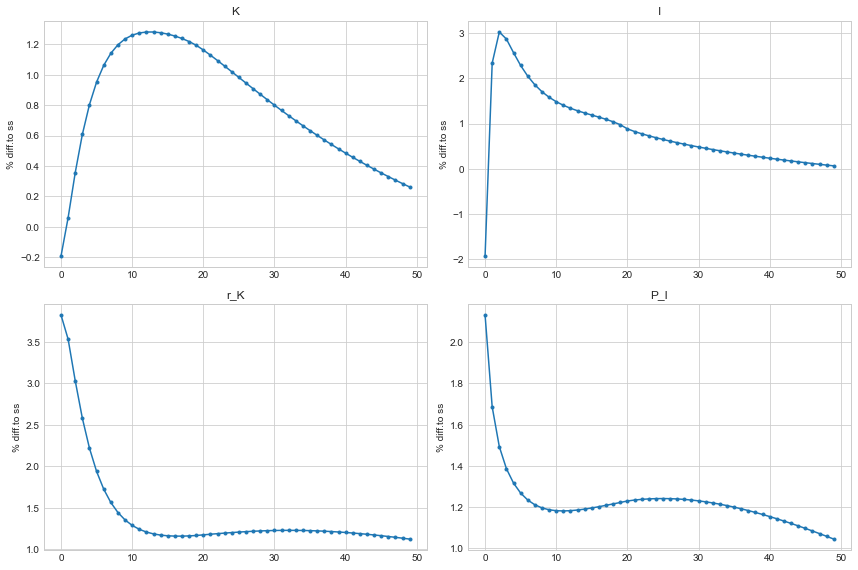

In [60]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

## Production firms

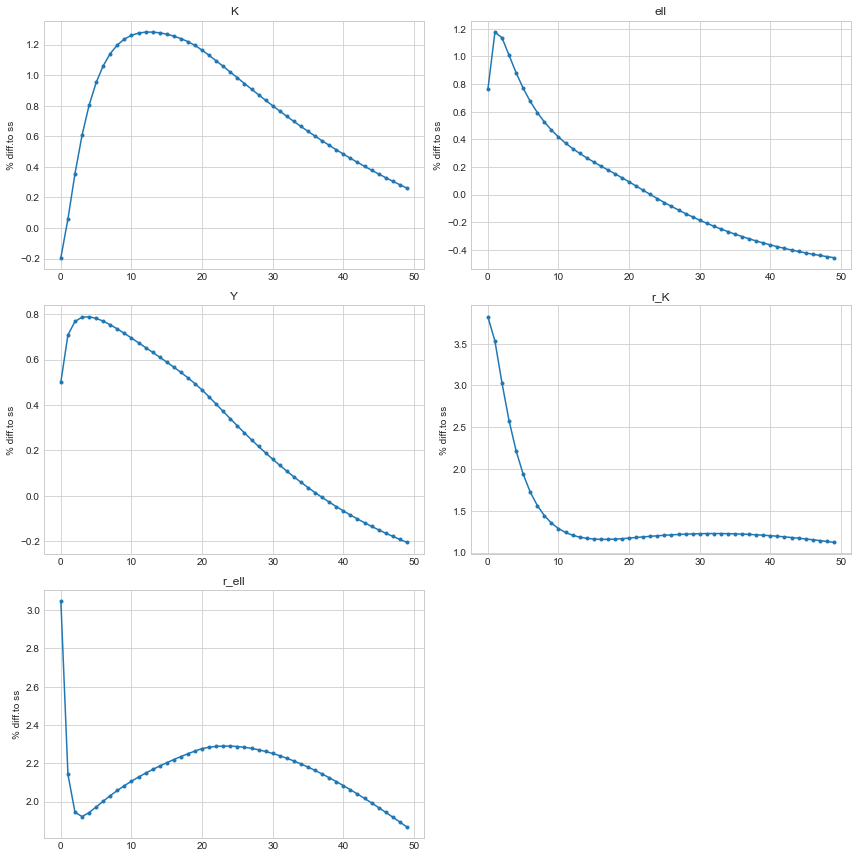

In [61]:
model.plot_IRF(varlist=['K','ell','Y','r_K','r_ell'],ncol=2)

## Government

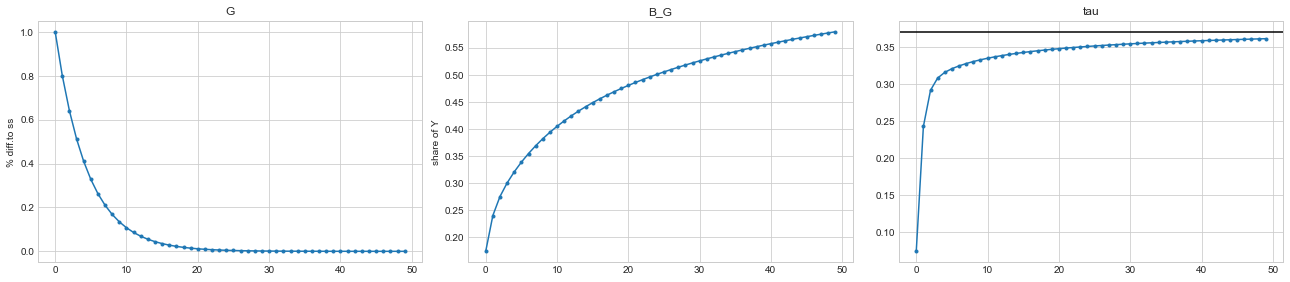

In [62]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'])

## Households - aggregate

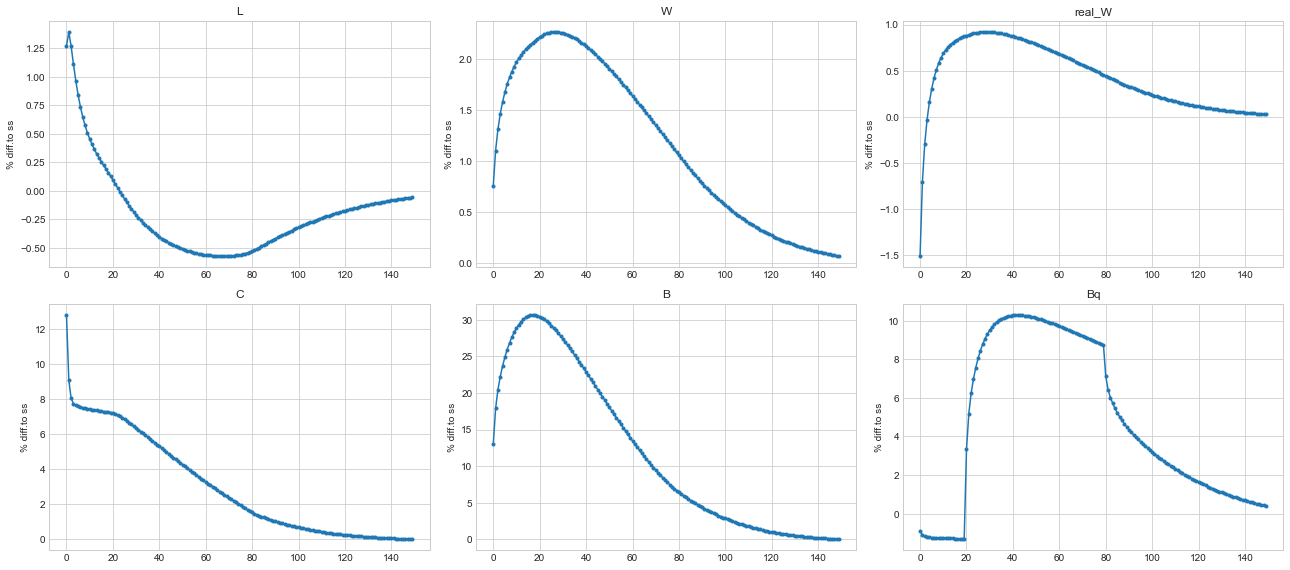

In [63]:
model.plot_IRF(varlist=['L','W','real_W','C','B','Bq'],ncol=3, T_IRF = 150)